Connected to temiz_env (Python 3.10.13)

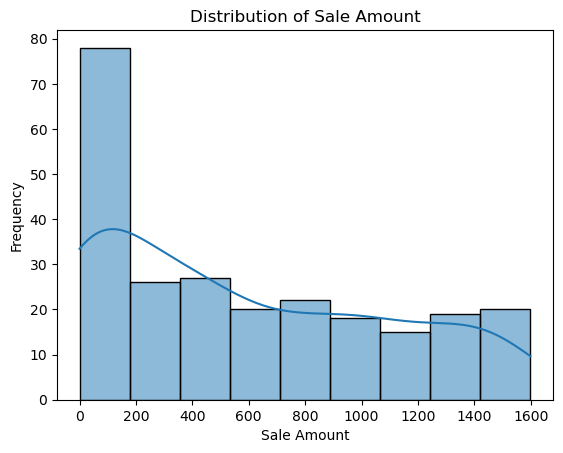

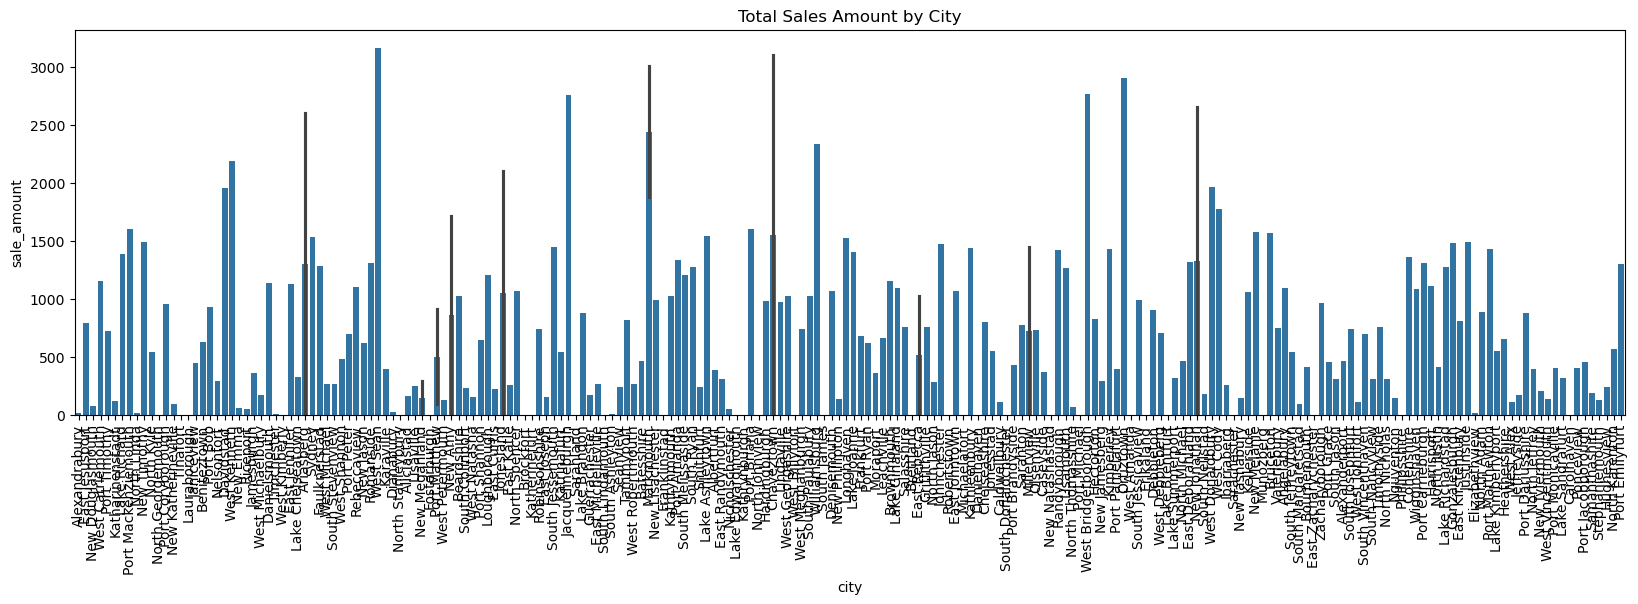

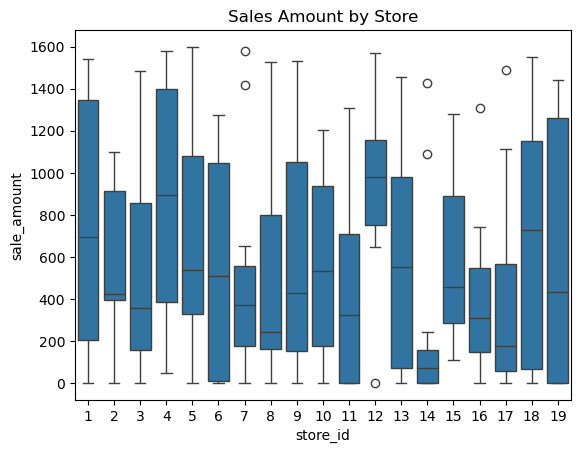

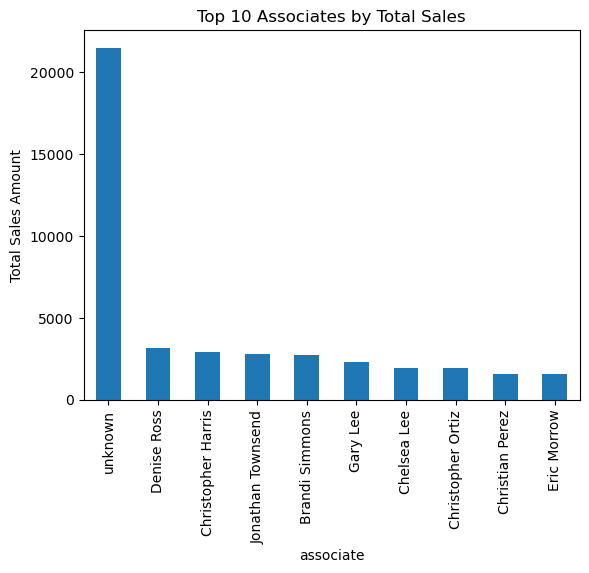

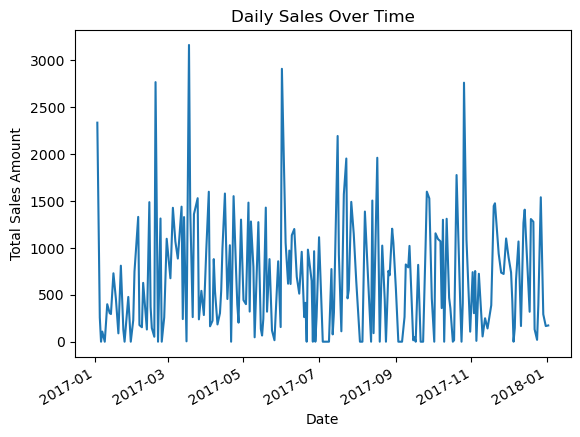

<ipython-input-1-cc00685a7e03>:62: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df["hour"] = pd.to_datetime(df["time"]).dt.hour


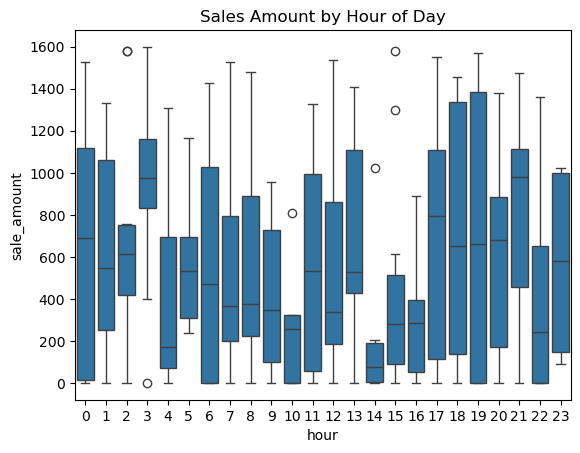

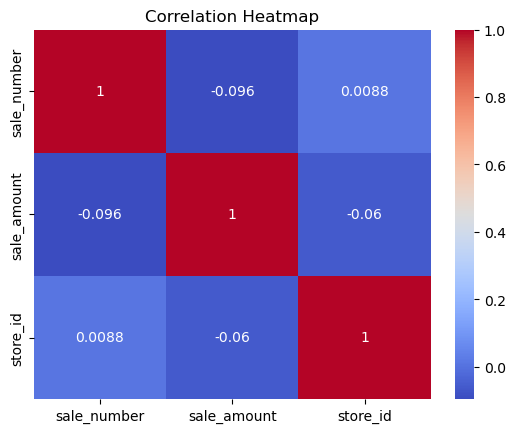

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

df=pd.read_csv("C:/Users/llm_cleaned_final.csv")
df.head()


#Umsatzverteilung
sns.histplot(df["sale_amount"], kde=True)
plt.title("Distribution of Sale Amount")
plt.xlabel("Sale Amount")
plt.ylabel("Frequency")
plt.show()

#Umsatz nach Stadt (Top / Low Performer)
plt.figure(figsize=(20,5))
sns.barplot(
    x="city",
    y="sale_amount",
    data=df,
    estimator=sum
)
plt.xticks(rotation=90)
plt.title("Total Sales Amount by City")
plt.show()

#Umsatz nach Filiale (store_id)
sns.boxplot(
    x="store_id",
    y="sale_amount",
    data=df
)
plt.title("Sales Amount by Store")
plt.show()

#Mitarbeiter-Performance (Associate)
top_associates = (
    df.groupby("associate")["sale_amount"]
    .sum()
    .sort_values(ascending=False)
    .head(10)
)

top_associates.plot(kind="bar")
plt.title("Top 10 Associates by Total Sales")
plt.ylabel("Total Sales Amount")
plt.show()


#Zeitliche Analyse (Datum)
df["Date"] = pd.to_datetime(df["Date"])

daily_sales = df.groupby("Date")["sale_amount"].sum()

daily_sales.plot()
plt.title("Daily Sales Over Time")
plt.ylabel("Total Sales Amount")
plt.show()

#Uhrzeit-Analyse (optional, stark)
df["hour"] = pd.to_datetime(df["time"]).dt.hour

sns.boxplot(
    x="hour",
    y="sale_amount",
    data=df
)
plt.title("Sales Amount by Hour of Day")
plt.show()

#Korrelationen (numeric only)
corr = df[["sale_number", "sale_amount", "store_id"]].corr()

sns.heatmap(corr, annot=True, cmap="coolwarm")
plt.title("Correlation Heatmap")
plt.show()